In [75]:
from sklearn.cluster import KMeans
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from statsmodels.tools.eval_measures import rmse
import time
from pandas import DataFrame
from pylab import rcParams
rcParams['figure.figsize'] = 15,11


from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose



from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
#from pmdarima import auto_arima

In [30]:
df = pd.read_csv("ALLsellMFGS.csv")

In [31]:
corr_list = df.corr().iloc[:,0]

In [32]:
corr_list.sort_values(ascending = False).head(20)

Year                                1.000000e+00
COMPASS                             6.118746e-01
HUBBELL                             5.148704e-01
HBA                                 1.013419e-01
KIM                                 7.570642e-02
Month                               1.242623e-14
COL                                -2.805235e-01
DLE                                -3.681443e-01
Lines                              -4.054846e-01
TotalSell                          -4.107072e-01
PRES                               -4.306357e-01
OTHER                              -5.492490e-01
Orders                             -6.231717e-01
Name: Year, dtype: float64

In [33]:
df.head()


,Date,Year,Month,TotalSell,Orders,Lines,COL,COMPASS,DLE,HBA,HUBBELL,KIM,PRES,OTHER
0,1-1-2009,2009,1,574846.34,187,607,161107.04,0.00,63920.72,0.0,13758.13,3201.0,35773.18,297086.27
1,2-1-2009,2009,2,687139.79,193,608,93274.18,0.00,33695.08,0.0,14272.85,778.0,18384.47,526735.21
2,3-1-2009,2009,3,483208.89,156,492,132238.26,2704.56,41272.80,0.0,11981.92,1330.0,35919.99,257761.36
3,4-1-2009,2009,4,357256.85,133,391,47244.15,0.00,15468.35,0.0,8260.60,0.0,9442.39,276841.36
4,5-1-2009,2009,5,236400.28,103,310,53854.05,0.00,31418.80,0.0,16841.06,466.0,3876.56,129943.81


In [34]:
dfCOL = df.COL

In [35]:
dfCOLUMBIA = df.groupby(by="Date")["COL"].sum()

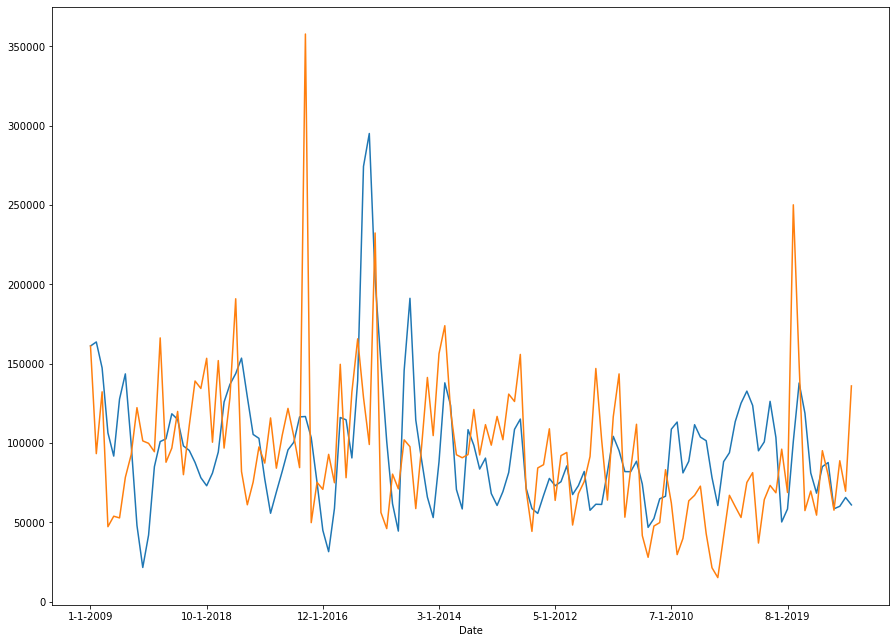

In [36]:
dfCOLUMBIA.rolling(window=2, min_periods =1).mean().plot();
dfCOL.plot();

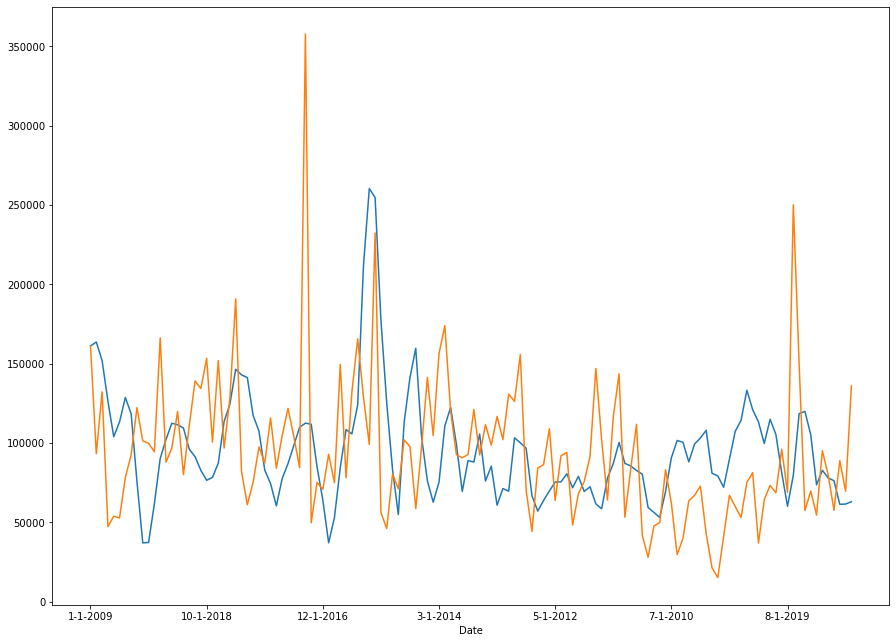

In [37]:
dfCOLUMBIA.rolling(window=3, min_periods =1).mean().plot();
dfCOL.plot();

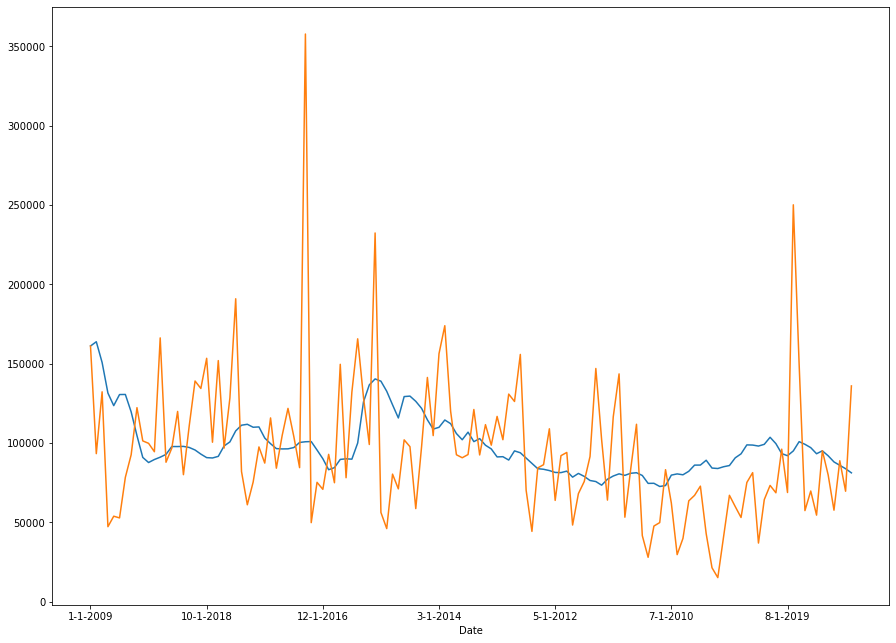

In [15]:
dfCOLUMBIA.ewm(alpha = 0.1, min_periods = 1).mean().plot();

dfCOL.plot();

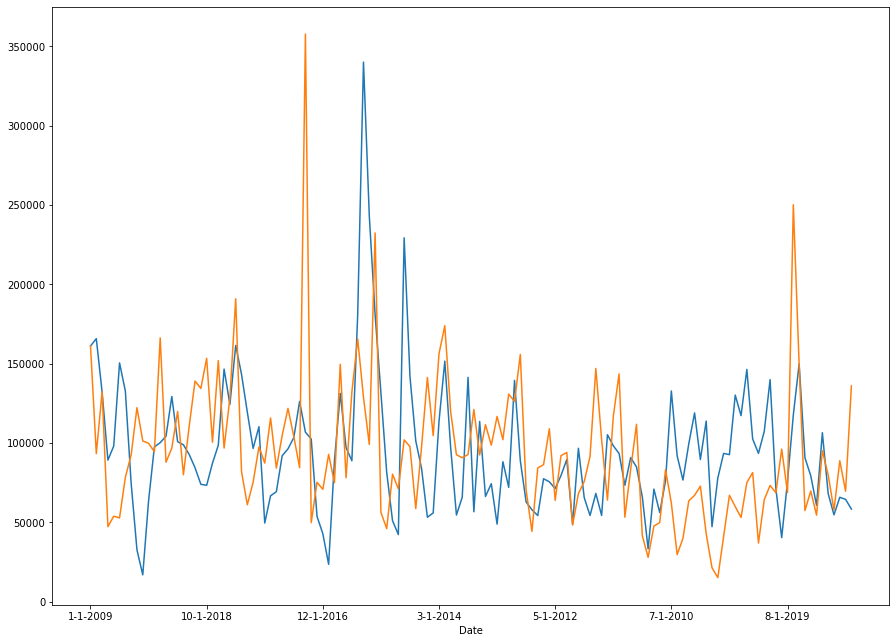

In [16]:
dfCOLUMBIA.ewm(alpha = 0.9, min_periods = 1).mean().plot();

dfCOL.plot();

In [18]:
len(dfCOL)*.8

105.60000000000001

In [19]:
#train test split for out of sample validation
df_trainCOL = df.iloc[:105]
df_testCOL = df.iloc]
lm = linear_model.LinearRegression()

In [28]:
#model = lm.fit(df_trainCOL[["COL"]], df_trainCOL)

In [21]:
Orders = df['Orders'].shift(-1)
Lines = df['Lines'].shift(-1)

In [24]:
#train test split for out of sample validation
df_train = df.iloc[:105]
df_test = df.iloc[105:]
lm = linear_model.LinearRegression()

In [25]:
model = lm.fit(df_train[["Orders", "Lines"]], df_train["TotalSell"])

In [27]:
predictions = lm.predict(df_test[["Orders"]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

In [40]:
df = df.drop(['Year','Month'], axis = 1)

In [41]:
datetime = pd.to_datetime(df['Date'])

In [44]:
df['datetime'] = datetime

In [45]:
#group by date and aggregate by sum
df = df.groupby(df['datetime']).sum()

In [46]:
from sklearn.cluster import KMeans

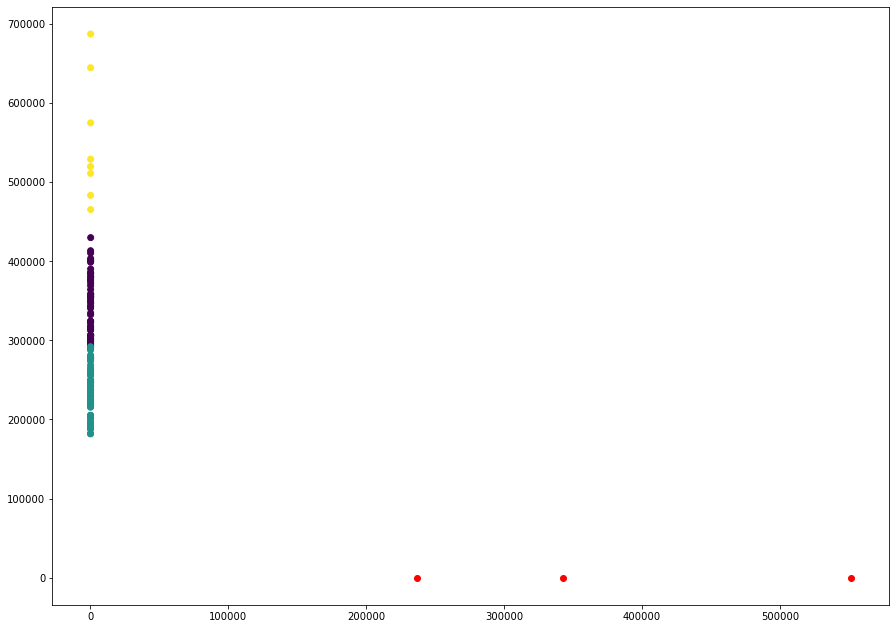

In [47]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(df['Orders'], df['TotalSell'], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

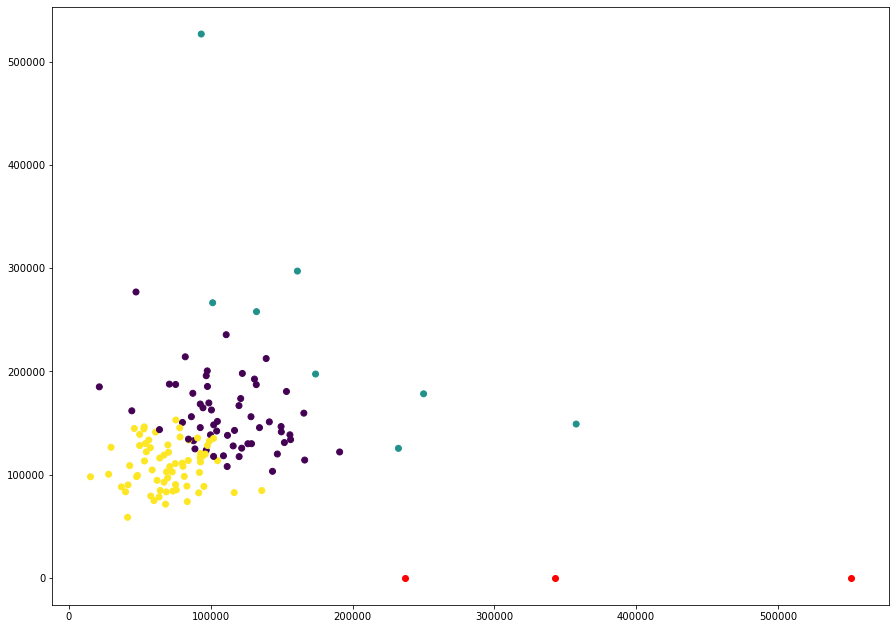

In [49]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(df['COL'], df['OTHER'], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

C:\Users\aleahl\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


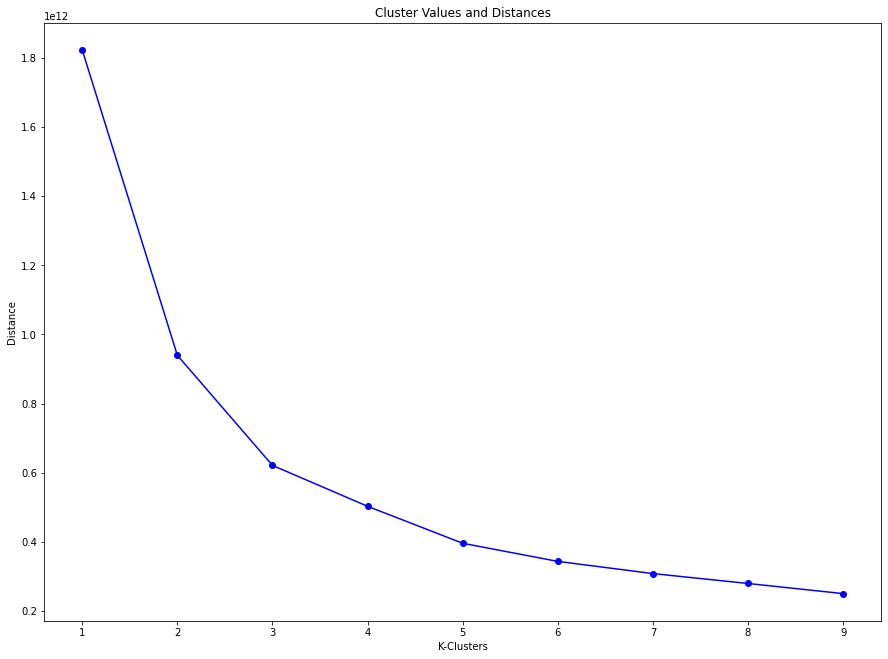

In [50]:
distances = []

K = range(1,10)
for k in K:
    ClusterInfo = kmeanModel = KMeans(n_clusters=k).fit(df)
    distances.append(ClusterInfo.inertia_)

plt.plot(K, distances, 'bo-')
plt.xlabel('K-Clusters')
plt.ylabel('Distance')
plt.title('Cluster Values and Distances')
plt.show()

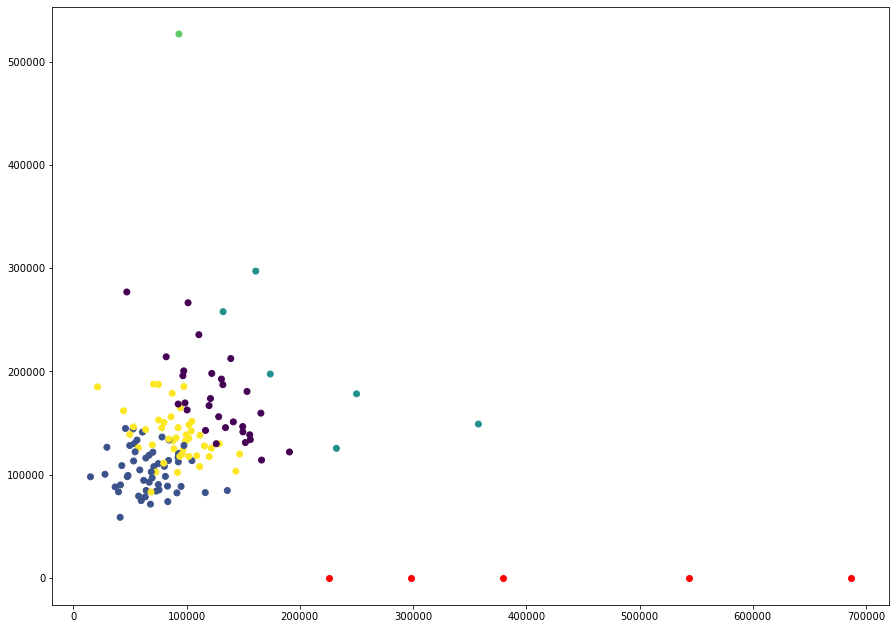

In [51]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(df['COL'], df['OTHER'], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

In [53]:
#getting lists of the cluster groups

In [56]:
cluster_map = pd.DataFrame()
cluster_map['df_index'] = df.index.values
cluster_map['cluster'] = kmeans.labels_

In [57]:
#getting the data for cluster group 3
cluster_map[cluster_map.cluster ==3]

,df_index,cluster
1,2009-02-01,3


In [58]:
cluster_map[cluster_map.cluster ==1]

,df_index,cluster
4,2009-05-01,1
5,2009-06-01,1
6,2009-07-01,1
27,2011-04-01,1
32,2011-09-01,1
33,2011-10-01,1
36,2012-01-01,1
38,2012-03-01,1
41,2012-06-01,1
42,2012-07-01,1


In [59]:
cluster_map[cluster_map.cluster ==2]

,df_index,cluster
0,2009-01-01,2
2,2009-03-01,2
37,2012-02-01,2
49,2013-02-01,2
61,2014-02-01,2
121,2019-02-01,2


In [60]:
cluster_map[cluster_map.cluster ==4]

,df_index,cluster
7,2009-08-01,4
10,2009-11-01,4
11,2009-12-01,4
13,2010-02-01,4
16,2010-05-01,4
23,2010-12-01,4
28,2011-05-01,4
30,2011-07-01,4
31,2011-08-01,4
34,2011-11-01,4


In [61]:
cluster_map[cluster_map.cluster ==5]

,df_index,cluster


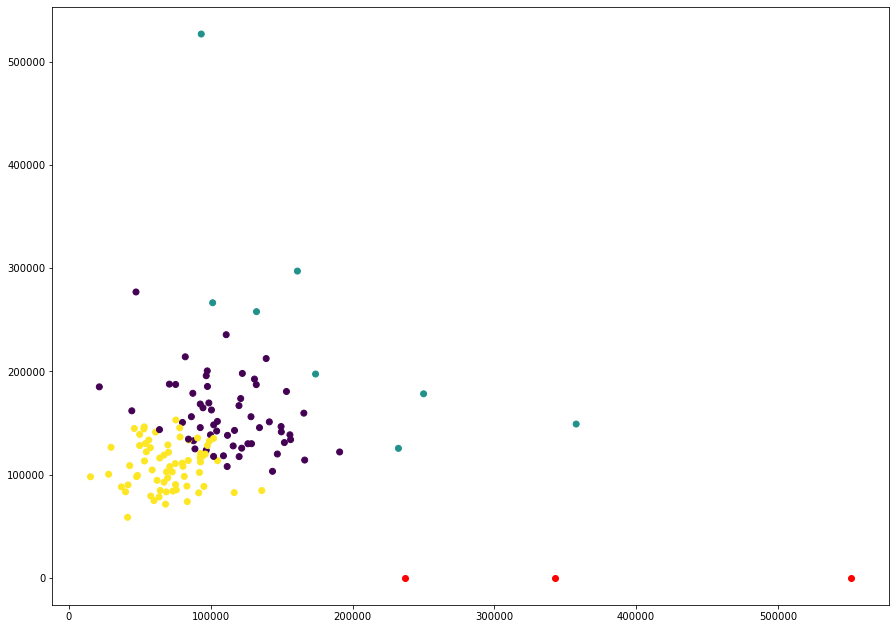

In [62]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_

plt.scatter(df['COL'], df['OTHER'], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

In [63]:
cluster_map = pd.DataFrame()
cluster_map['df_index'] = df.index.values
cluster_map['cluster'] = kmeans.labels_

In [64]:
cluster_map[cluster_map.cluster ==1]

,df_index,cluster
0,2009-01-01,1
1,2009-02-01,1
2,2009-03-01,1
9,2009-10-01,1
37,2012-02-01,1
49,2013-02-01,1
61,2014-02-01,1
121,2019-02-01,1


In [65]:
cluster_map[cluster_map.cluster ==2]

,df_index,cluster
4,2009-05-01,2
5,2009-06-01,2
6,2009-07-01,2
27,2011-04-01,2
28,2011-05-01,2
...,...,...
126,2019-07-01,2
127,2019-08-01,2
128,2019-09-01,2
130,2019-11-01,2


In [66]:
cluster_map[cluster_map.cluster ==3]

,df_index,cluster


In [67]:
#standardizing the dataset before kmeans clustering
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
scaler.fit(df.drop('TotalSell', axis=1))

StandardScaler()

In [70]:
scaled_features = scaler.transform(df.drop('TotalSell', axis=1))

In [71]:
scaled_data = pd.DataFrame(scaled_features, columns = df.drop('TotalSell', axis=1).columns)

In [73]:
x=scaled_data
y=df.TotalSell

In [78]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)


In [79]:
model = KNeighborsClassifier(n_neighbors=1)

In [80]:
model.fit(x_training_data, y_training_data)

ValueError: Unknown label type: 'continuous'

In [82]:
from sklearn import preprocessing.LabelEncoder()

SyntaxError: invalid syntax (<ipython-input-82-1ba2ef2bcd35>, line 1)